In [ ]:
!pip install transformers
!pip install tensorflow_addons
!pip install sentencepiece
!pip install cv
#-----------IMPORTANT-------------WARNING-------------
#restart runtime after installation

     |████████████████████████████████| 686kB 2.9MB/s 
     |████████████████████████████████| 1.2MB 4.0MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#extracting videos
!unzip '/content/drive/MyDrive/research_/data/videoFolder.zip' -d 'videos'

In [ ]:
import pandas as pd
data = pd.read_csv(r'/content/drive/MyDrive/research_/data/vine_labeled_cyberbullying_data.csv')
data_1 = data.drop(['_golden',
 '_unit_state',
 '_trusted_judgments',
 '_last_judgment_at',
 'question1:confidence',
 'question2:confidence',
 'nil',
 'question1_gold',
 'question2_gold',
 'username'],axis=1)
def clean_dataset(df, columns):
    d = df.drop(columns,axis=1)
    return d
    
column_names_1 = data_1.columns.tolist()

import re
def get_all_comments(df,index_from_beginning, index_from_end,regex_to_remove,arrange_regex):
    columns = df.columns.tolist()[index_from_beginning:index_from_end]
    parrange = re.compile(arrange_regex)
    for i in range(len(df)):
        if(bool(re.search(parrange,str(df[columns[0]][i]))) and bool(re.search(parrange,str(df[columns[-1]][i])))==False ):
            #temp = df[columns[0]][i]
            df[columns[0]][i] = df[columns[-1]][i]
            df[columns[-1]][i] = ""
    pattern = re.compile(regex_to_remove)
    All = []
    for i in range(len(df)):
        comments = []
        for column in columns:
            sub = re.sub(pattern,"",str(df[column][i]))
            if(sub=='empty'):
                comments.append("")
            else:
                comments.append(sub)
        count = 0
        for i in range(0, len(comments)-1): 
            if (comments[i] != ""): 
                comments[count], comments[i] = comments[i], comments[count] 
                count+=1
        All.append(comments[0:-1])
    df['comments'] = All
    return df.drop(columns,axis=1)

regex_to_remove = r'(<font\s*color="#\w{6}">.*</font>::| \(created_at:.*\)| Media\s*posted\s*at:.*000000)'
arrange_regex = r'Media\s*posted\s*at:.*000000'
df = get_all_comments(data_1,3,-4,regex_to_remove,arrange_regex)

# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['question1']= label_encoder.fit_transform(df['question1']) 
df['question2']= label_encoder.fit_transform(df['question2'])   
df['question1'].unique() 
df['question2'].unique() 

#making (0=noneAgg, 1=aggression) and (0=noneBll , 1=bullying)
for i in range(len(df)):
    df['question1'][i] = abs(df['question1'][i]-1)
    df['question2'][i] = abs(df['question2'][i]-1)
    


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
d = {}
with open(r'/content/drive/MyDrive/research_/data/urls_to_postids.txt','r') as post_id_file:
  for line in post_id_file:
    l = line.split(',')
    d[l[1].replace("\n", "")]=l[0]
    #print(l[0])
    #lis.append(l)

dir = 'videos/videoFolder/{0}.mp4'
path = []
for i in range(len(df)):
  key = df['videolink'][i]
  p = ""
  if key in d:
    print('present',key)
    p = dir.format(int(d[key])) 
  else:
    print('not_present',key) 
    p = 'not_available'
  path.append(p)

df['directory'] = path
del d, path

df_txt = df.drop(['_unit_id','postid','videolink'], axis=1)
df_txt

present https://vine.co/v/OgK06TtBUXz/embed/simple
present https://vine.co/v/OTVWOYB9B3p/embed/simple
present https://vine.co/v/MlY0tvA90Al/embed/simple
present https://vine.co/v/Mh19DrmqXE5/embed/simple
present https://vine.co/v/Oa5tvQi2BbM/embed/simple
present https://vine.co/v/OUTI1J6XrWO/embed/simple
present https://vine.co/v/MxwpKA1nxeg/embed/simple
present https://vine.co/v/MYjVea0HpKu/embed/simple
present https://vine.co/v/OFXJWgwFtva/embed/simple
present https://vine.co/v/MEjvBQvEl26/embed/simple
present https://vine.co/v/OWZvnAEYnTE/embed/simple
present https://vine.co/v/OdK6OUEulDV/embed/simple
present https://vine.co/v/OjaDjlMhEJD/embed/simple
present https://vine.co/v/OWHM2PHlZMY/embed/simple
present https://vine.co/v/MxE57eTpWid/embed/simple
present https://vine.co/v/OBBIgxx0dZ1/embed/simple
present https://vine.co/v/hxYV3mJvw5p/embed/simple
present https://vine.co/v/MQOAWJwxvhp/embed/simple
present https://vine.co/v/OhdjrI1v5AF/embed/simple
present https://vine.co/v/Mi1VF

,question1,question2,likecount,mediacaption,comments,directory
0,0,0,2501,This ones for Josh Peck !! Just a little throw...,"[Omg yass Josh Peck, Josh Peck, This is amazin...",videos/videoFolder/1156467652974342144.mp4
1,0,0,107,hot summer nights 😌💭,"[Lycia Faith #lyciafaith #lyciafaithedit, Lyci...",videos/videoFolder/1172294545229434880.mp4
2,0,0,295,Reason why to smile.. Lycia Faith 😊💜 (please t...,[Lycia Faith Lycia Faith Lycia Faith Lycia ...,videos/videoFolder/1116987080183062528.mp4
3,0,0,89,Why Females Always Think This Way? #dreamteam ...,[TCameron because they usually do and that's a...,videos/videoFolder/1057501435811500032.mp4
4,1,1,86,Young thug just gayyyy lmfao #dannyglover #You...,"[LMAO, Idk if he's gay or not but the nigga i...",videos/videoFolder/1122565290144968704.mp4
...,...,...,...,...,...,...
965,1,1,6,I'm #generous even to my #haters,"[Brian well said, Nasty as fuck, Dude wtf, U d...",videos/videoFolder/1110277591434170368.mp4
966,1,1,857,Ugly bitch 💅 #teamwildside,"[😹😹 ugly people ain't even allowed to laugh?, ...",videos/videoFolder/1086543779877523456.mp4
967,1,0,3449,How i be in school. 😂 #wtf,"[LiveLikeDavis, Ella Regan I want my hair to b...",videos/videoFolder/1129971720628121600.mp4
968,1,0,630,thick,"[Damn....thick all.over, Bitch is shaped like ...",videos/videoFolder/1141143060303282176.mp4


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
max_words = 50402  # We will only consider the top  words in the dataset
tokenizer_char = Tokenizer(num_words=None, char_level=True, oov_token='UNK')
tokenizer_m = Tokenizer(num_words=max_words)
for t in range(len(df_txt)):
    tokenizer_char.fit_on_texts(df['comments'][t][i].lower().replace("[^a-zA-Z#]", " ") for i in range(0,len(df['comments'][t])))
    tokenizer_m.fit_on_texts(str(df_txt['mediacaption'][t]).lower().replace("[^a-zA-Z#]", " "))# for q in range(0,len(df)))
max_len_cap = 30 #140
seq = tokenizer_m.texts_to_sequences(str(df_txt['mediacaption'][t]).lower().replace("[^a-zA-Z#]", " ") for t in range(0,len(df_txt)))
seq1 = pad_sequences(seq, padding='post', maxlen=max_len_cap).tolist()
df_txt['mediacaption_t'] = seq1
df_txt = df_txt.drop(['mediacaption'],axis=1)

In [ ]:
#------------------------------------character tokenization of comments----------------------------------------------------------
vocab = tokenizer_char.word_docs
vocab = dict(sorted(vocab.items(), key=lambda vocab: vocab[1], reverse=True))
relevant_characters=0
voc=""
for key, value in vocab.items():
    if (value>20):
        relevant_characters+=1
        voc+=key
print("relevant_characters: {}".format(relevant_characters))

char_dict = {}
for i, char in enumerate(voc):
    char_dict[char] = i + 1
    
# Use char_dict to replace the tk.word_index
tokenizer_char.word_index = char_dict 
# Add 'UNK' to the vocabulary 
tokenizer_char.word_index[tokenizer_char.oov_token] = max(char_dict.values()) + 1


df_txt['comments_char'] = [None] * 970
for t in range(len(df_txt)):
    sequences = tokenizer_char.texts_to_sequences(df['comments'][t][i].lower().replace("[^a-zA-Z#]", " ") for i in range(0,len(df['comments'][t])))
    #seq = pad_sequences(sequences, padding='post', maxlen=max_len)
    df_txt['comments_char'][t] = sequences

max_len_c = 0
    
for t in range(len(df)):
    # Get max training sequence length for comments
    m = max([len(x) for x in df_txt['comments_char'][t]])
    if(max_len_c < m):
        max_len_c = m
    #print(max_len_c)
print('max length of character vector:{}'.format(max_len_c))

for t in range(len(df_txt)):
    df_txt['comments_char'][t] = pad_sequences(df_txt['comments_char'][t], padding='post', maxlen=max_len_c)

relevant_characters: 206


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


max length of character vector:134


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df_txt

,question1,question2,likecount,comments,directory,mediacaption_t,comments_char
0,0,0,2501,"[Omg yass Josh Peck, Josh Peck, This is amazin...",videos/videoFolder/1156467652974342144.mp4,"[3, 65, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[4, 15, 17, 1, 13, 2, 6, 6, 1, 25, 4, 6, 9, 1..."
1,0,0,107,"[Lycia Faith #lyciafaith #lyciafaithedit, Lyci...",videos/videoFolder/1172294545229434880.mp4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[11, 13, 16, 5, 2, 1, 20, 2, 5, 8, 9, 1, 36, ..."
2,0,0,295,[Lycia Faith Lycia Faith Lycia Faith Lycia ...,videos/videoFolder/1116987080183062528.mp4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[11, 13, 16, 5, 2, 1, 20, 2, 5, 8, 9, 1, 1, 1..."
3,0,0,89,[TCameron because they usually do and that's a...,videos/videoFolder/1057501435811500032.mp4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[8, 16, 2, 15, 3, 10, 4, 7, 1, 21, 3, 16, 2, ..."
4,1,1,86,"[LMAO, Idk if he's gay or not but the nigga i...",videos/videoFolder/1122565290144968704.mp4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[11, 15, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
965,1,1,6,"[Brian well said, Nasty as fuck, Dude wtf, U d...",videos/videoFolder/1110277591434170368.mp4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[21, 10, 5, 2, 7, 1, 19, 3, 11, 11, 1, 6, 2, ..."
966,1,1,857,"[😹😹 ugly people ain't even allowed to laugh?, ...",videos/videoFolder/1086543779877523456.mp4,"[137, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[104, 104, 1, 14, 17, 11, 13, 1, 22, 3, 4, 22..."
967,1,0,3449,"[LiveLikeDavis, Ella Regan I want my hair to b...",videos/videoFolder/1129971720628121600.mp4,"[5, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[11, 5, 23, 3, 11, 5, 18, 3, 12, 2, 23, 5, 6,..."
968,1,0,630,"[Damn....thick all.over, Bitch is shaped like ...",videos/videoFolder/1141143060303282176.mp4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[12, 2, 15, 7, 26, 26, 26, 26, 8, 9, 5, 16, 1..."


In [ ]:
#-------------creating comments's character embeddings weights matrix------------------------------
import numpy as np
char_vocab_size = len(tokenizer_char.word_index)
char_embedding_weights = []  # (70, 69)
char_embedding_weights.append(np.zeros(char_vocab_size))  

for char, i in tokenizer_char.word_index.items():  # from index 1 to end
    onehot = np.zeros(char_vocab_size)
    onehot[i - 1] = 1
    char_embedding_weights.append(onehot)

char_embedding_weights = np.asarray(char_embedding_weights)
print("embedding_weights.shape: {}".format(char_embedding_weights.shape))

embedding_weights.shape: (208, 207)


In [ ]:
#split into train,valid,test
#------------------splitting into training and testing--------------------
#import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import random
random.seed(30)
rand = random.randint(0,42)
#--using stratified splitting for balanced splitting
#train_txt_df, test_txt_df = train_test_split(df_txt, test_size=0.1, random_state=rand, stratify=df_txt[['question1','question2']])
#train_txt_df, validate_txt_df =  train_test_split(train_txt_df, test_size=0.06, random_state=rand, stratify=train_txt_df[['question1','question2']])
train_txt_df, validate_txt_df = train_test_split(df_txt, test_size=0.1, random_state=rand, stratify=df_txt[['question1','question2']])
print("train dataframe shape: {}".format(train_txt_df.shape))
print("validate dataframe shape: {}".format(validate_txt_df.shape))
#print("test dataframe shape: {}".format(test_txt_df.shape))
def splits_before_sampling(df):
    hate =0
    non = 0
    for i in df.index:
        if(df['labels'][i]):
            hate+=1
    else:
        non+=1
    return hate,non,hate/(hate+non)
#print("-----Train Split-----")
#print("(hate, non-hate, hate%)")
#print(splits_before_sampling(train_txt_img_df))

#print("-----Validation Split-----")
#print("(hate, non-hate, hate%)")
#print(splits_before_sampling(validate_txt_img_df))

#print("-----Test Split-----")
#print("(hate, non-hate, hate%)")
#print(splits_before_sampling(test_txt_img_df))

train dataframe shape: (873, 7)
validate dataframe shape: (97, 7)


In [ ]:
#----------------------Sampling from dataset-------------------------------------
index = train_txt_df.index.values.tolist()
#id = train_txt_img_df['tweet_id'].values.tolist()
#id = np.asarray(id)
label = train_txt_df['question2'].values.tolist()
label = np.array(label)
label = list(label)
ids = []
for i in range(0,len(index)):
  ids.append([index[i], label[i]])

In [ ]:
!pip install imbalanced-learn
	
# check version number
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.8)
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

train_df_over, train_label_df_over = oversample.fit_resample(ids, label)
train_df_over, train_label_df_over = undersample.fit_resample(train_df_over, train_label_df_over)
train_df_over.shape

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(958, 2)

In [ ]:
print(train_df_over)
print(train_label_df_over)

from collections import Counter
print(Counter(train_label_df_over))

[[383   0]
 [680   0]
 [261   0]
 ...
 [321   1]
 [585   1]
 [ 29   1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
train_list = []
for i in range(0,len(train_df_over)):
  #'labels','input_ids','token_type_ids','attention_mask','image_dir','char_embed'
  #'question1',	'question2',	'likecount',	'comments',	'directory',	'mediacaption_t',	'comments_char'
  index = train_df_over[i][0]
  question1	= train_txt_df['question1'][index]
  question2	= train_txt_df['question2'][index]
  likecount	= train_txt_df['likecount'][index]
  comments = train_txt_df['comments'][index]
  directory	= train_txt_df['directory'][index]
  mediacaption_t = train_txt_df['mediacaption_t'][index]
  comments_char = train_txt_df['comments_char'][index]

  train_list.append([question1, question2, likecount,	comments,	directory, mediacaption_t,	comments_char])
train_df = pd.DataFrame(train_list, columns=['question1',	'question2', 'likecount',	'comments',	'directory', 'mediacaption_t', 'comments_char'])
train_df

,question1,question2,likecount,comments,directory,mediacaption_t,comments_char
0,0,0,4836,[Not even funny. Flat out trying to get attent...,videos/videoFolder/1047619465950736384.mp4,"[70, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[7, 4, 8, 1, 3, 23, 3, 7, 1, 20, 14, 7, 7, 13..."
1,0,0,1130,"[ Santa Claus ™ 🙈 lmao oh lawd 🎅🎄, Ok I'll gla...",videos/videoFolder/1019862122563563520.mp4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[1, 6, 2, 7, 8, 2, 1, 16, 11, 2, 14, 6, 1, 69..."
2,0,0,187,"[My nigga you seen how he came outta nowhere, ...",videos/videoFolder/1127053283874267136.mp4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[15, 13, 1, 7, 5, 17, 17, 2, 1, 13, 4, 14, 1,..."
3,0,0,849,"[Holy hotness! What app ???, Song?, Omg this g...",videos/videoFolder/1089592394258735104.mp4,"[13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[9, 4, 11, 13, 1, 9, 4, 8, 7, 3, 6, 6, 28, 1,..."
4,0,0,1461,"[😍 Franchescaaa, He could be the one by Hannah...",videos/videoFolder/1151348347664293888.mp4,"[252, 5, 94, 253, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[38, 1, 20, 10, 2, 7, 16, 9, 3, 6, 16, 2, 2, ..."
...,...,...,...,...,...,...,...
953,1,1,1314,[I hate cancer I feel bad for the people who h...,videos/videoFolder/1131106768244871168.mp4,"[13, 101, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[5, 1, 9, 2, 8, 3, 1, 16, 2, 7, 16, 3, 10, 1,..."
954,1,1,125,[Shaybaybay and yo extra fat greasy ass hit ...,videos/videoFolder/1140906491818233856.mp4,"[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[6, 9, 2, 13, 21, 2, 13, 21, 2, 13, 1, 2, 7, ..."
955,1,1,6,"[Brian well said, Nasty as fuck, Dude wtf, U d...",videos/videoFolder/1110277591434170368.mp4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[21, 10, 5, 2, 7, 1, 19, 3, 11, 11, 1, 6, 2, ..."
956,1,1,3156,"[Justine Tabadero Pixie Iwata, Hilde Figueroa...",videos/videoFolder/1118658638433644544.mp4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[25, 14, 6, 8, 5, 7, 3, 1, 8, 2, 21, 2, 12, 3..."


In [ ]:
train_df['comments_char'][2].shape

(660, 134)

In [ ]:
del question1, question2, likecount, comments, directory, mediacaption_t, comments_char
del train_df_over, train_label_df_over, label, index, ids
del train_txt_df, df_txt, df, data, data_1

In [ ]:
!pip install transformers
#!pip install tensorflow-gpu
import tensorflow as tf
from transformers import XLNetTokenizer
import numpy as np
Tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
max_length = 512
def convert_text_to_feature(tweetTxt):
    xlnet_input = Tokenizer.encode_plus(tweetTxt,
                 add_special_tokens=True,
                 max_length=max_length,
                 return_attention_mask=True,
                 return_token_type_ids=True,
                 pad_to_max_length=True,
                 return_tensors="tf",
                 truncation = True
                 )
    return xlnet_input

# map to the expected input to TFBertForSequenceClassification, see here 
def map_ds_to_dict(input_ids, attention_masks, token_type_ids):#, label):
    return {
        "input_ids": input_ids,
        "token_type_ids": token_type_ids,
        "attention_mask": attention_masks,
        }#, label

def encode_ds(ds):
   # prepare list, so that we can build up final TensorFlow dataset from slices.
    input_ids = []
    token_type_ids = []
    attention_mask = []
    labels = []
    
    for t in range(0,len(ds)) :
        xlnet_input = convert_text_to_feature(ds[t])
  
        input_ids.append(np.asarray(xlnet_input["input_ids"][0], dtype="int32"))
        token_type_ids.append(np.asarray(xlnet_input["token_type_ids"][0], dtype="int32"))
        attention_mask.append(np.asarray(xlnet_input["attention_mask"][0], dtype="int32"))
        #labels.append(np.asarray(ds[tweet][1], dtype="int32"))
    return input_ids,token_type_ids,attention_mask#, labels

In [ ]:
#binary classification
import numpy as np
import tensorflow as tf
import re
import cv2 as cv
from math import floor
from keras.preprocessing.image import \
    ImageDataGenerator, img_to_array

class DataGenerator(tf.keras.utils.Sequence):
    def __init__(
        self, 
        df, 
        batch_size=32, 
        num_classes=None, 
        shuffle=True, 
        num_comments=5,
        rescale=1/255.,
        nb_frames: int = 5,
        use_frame_cache: bool = False,
        target_shape: tuple = (224, 224),
        transformation: ImageDataGenerator = None,
        nb_channel: int = 3,
        use_headers: bool = True,
        ):

        #---------------------------------------------
        # should be only RGB or Grayscale
        assert nb_channel in (1, 3)

        # shape size should be 2
        assert len(target_shape) == 2

        self.use_video_header = use_headers
        
        self.rescale = rescale
        self.target_shape = target_shape
        self.nb_channel = nb_channel
        self.transformation = transformation
        self.use_frame_cache = use_frame_cache
        self.nbframe = nb_frames
        self._random_trans = []
        self.__frame_cache = {}

        
        #self._current = 0
        self._framecounters = {}

        #---------------------------------------------
        self.batch_size = batch_size
        self.df = df
        self.indices = self.df.index.tolist()
        self.num_classes = num_classes
        self.shuffle = shuffle
        self.num_comments = num_comments
        #self.x_col = x_col
        #self.y_col = y_col
        self.on_epoch_end()

    def __len__(self):
        return (len(self.indices) // self.batch_size)

    def __getitem__(self, index):
        index = self.index[(index * self.batch_size) : ((index + 1) * self.batch_size)]
        batch = [self.indices[k] for k in index]
        com = self.num_comments
        labels = []
        #ignoring captions and likes
        #captions = []
        #likes = []
        comments = []
        comments_character = []
        
        #Video 
        shape = self.target_shape
        nbframe = self.nbframe
        images = []
        transformation = None

        for id in batch:
            labels.append(self.df.loc[id][1])
            #captions.append(self.df.loc[id][5])
            #likes.append(self.df.loc[id][2])
            s = ". "
            comments_set = self.df.loc[id][3][:com]
            commen = s.join(comments_set).lower()
            #remove emojis
            regrex_emoji_pattern = re.compile(pattern = "["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                  "]+", flags = re.UNICODE)
            commen = regrex_emoji_pattern.sub(r'',commen)
            #commen = re.sub(r'[^\w\s]','',commen)  #TO REMOVE FULLSTOPS
            comments.append(commen)

            #--------------getting character tokens for comments-----------------
            comments_character.append(self.df.loc[id][6][:com])

            #-------------------------------Video & frames--------------------------------
            # prepare a transformation if provided
            if self.transformation is not None:
                transformation = self._random_trans[i]

            video = self.df.loc[id][4] 
            
            if video not in self.__frame_cache:
                frames = self._get_frames(
                    video,
                    nbframe,
                    shape,
                    force_no_headers=not self.use_video_header)
                if frames is None:
                    # avoid failure, nevermind that video...
                    continue

                # add to cache
                if self.use_frame_cache:
                    self.__frame_cache[video] = frames

            else:
                frames = self.__frame_cache[video]

            # apply transformation
            if transformation is not None:
                frames = [self.transformation.apply_transform(
                    frame, transformation) for frame in frames]

            # add the sequence in batch
            images.append(frames)

        
        #------------------tokenising from bert tokeniser---------------------
        input_ids,token_type_ids,attention_mask = encode_ds(comments)
                    #comments.append(self.df.loc[id][3][:com])
        

        #------------------yielding batch-------------------------------------
        return [np.asarray(images, dtype=np.float32), 
                np.asarray(input_ids,dtype=np.int32), 
                np.asarray(token_type_ids,dtype=np.int32), 
                np.asarray(attention_mask,dtype=np.int32), 
                #np.asarray(captions,dtype=np.int32), 
                #np.asarray(likes,dtype=np.float32)/100,
                numpy.asarray(comments_character,dtype=np.int32)], np.asarray(labels,dtype=np.int32)

    def on_epoch_end(self):
        """ Called by Keras after each epoch """
        if self.transformation is not None:
            self._random_trans = []
            for _ in range(len(self.indices)):
                self._random_trans.append(
                    self.transformation.get_random_transform(self.target_shape)
                )
                
        self.index = np.arange(len(self.indices))
        if self.shuffle == True:
            np.random.shuffle(self.index)

    def count_frames(self, cap, name, force_no_headers=False):
        """ Count number of frame for video
        if it's not possible with headers """
        if not force_no_headers and name in self._framecounters:
            return self._framecounters[name]

        total = cap.get(cv.CAP_PROP_FRAME_COUNT)

        if force_no_headers or total < 0:
            # headers not ok
            total = 0
            # TODO: we're unable to use CAP_PROP_POS_FRAME here
            # so we open a new capture to not change the
            # pointer position of "cap"
            c = cv.VideoCapture(name)
            while True:
                grabbed, frame = c.read()
                if not grabbed:
                    # rewind and stop
                    break
                total += 1

        # keep the result
        self._framecounters[name] = total

        return total

    def _get_frames(self, video, nbframe, shape, force_no_headers=False):
        cap = cv.VideoCapture(video)
        total_frames = self.count_frames(cap, video, force_no_headers)
        orig_total = total_frames
        if total_frames % 2 != 0:
            total_frames += 1
        frame_step = floor(total_frames/(nbframe-1))
        # TODO: fix that, a tiny video can have a frame_step that is
        # under 1
        frame_step = max(1, frame_step)
        frames = []
        frame_i = 0

        while True:
            grabbed, frame = cap.read()
            if not grabbed:
                break

            frame_i += 1
            if frame_i == 1 or frame_i % frame_step == 0 or frame_i == orig_total:
                # resize
                frame = cv.resize(frame, shape)

                # use RGB or Grayscale ?
                if self.nb_channel == 3:
                    frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
                else:
                    frame = cv.cvtColor(frame, cv.COLOR_RGB2GRAY)

                # to np
                frame = img_to_array(frame) * self.rescale

                # keep frame
                frames.append(frame)

            if len(frames) == nbframe:
                break

        cap.release()

        if not force_no_headers and len(frames) != nbframe:
            # There is a problem here
            # That means that frame count in header is wrong or broken,
            # so we need to force the full read of video to get the right
            # frame counter
            return self._get_frames(
                    video,
                    nbframe,
                    shape,
                    force_no_headers=True)

        if force_no_headers and len(frames) != nbframe:
            # and if we really couldn't find the real frame counter
            # so we return None. Sorry, nothing can be done...
            #log.error("Frame count is not OK for video %s, "
            #          "%d total, %d extracted" % (
            #            video, total_frames, len(frames)))
            #return None
            return np.zeros((nbframe, shape[0],shape[1],self.nb_channel))

        return np.array(frames)

In [ ]:
import keras
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Input, concatenate, Dropout, TimeDistributed, Embedding, Conv1D, MaxPooling1D
from tensorflow.keras.layers import BatchNormalization, GlobalMaxPooling1D, GlobalAveragePooling1D, Flatten, Dot, concatenate, Add
from tensorflow.keras.layers import LeakyReLU, PReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import numpy

In [ ]:
def recurrentCNN_block(input_layer):
    out_filter = hidden_size*2

    x1 = Conv1D(filters=out_filter, kernel_size=1, padding='same', kernel_initializer='he_normal')(input_layer)
    x11 = BatchNormalization()(x1)
    x11 = PReLU()(x11)

    x2 = Conv1D(filters=out_filter, kernel_size=3, padding='same', kernel_initializer='he_normal')(x11)
    #x21 = merge([x1, x2], mode='sum')
    x21 = Add()([x1, x2])
    x21 = BatchNormalization()(x21)
    x21 = PReLU()(x21)

    x3 = Conv1D(filters=out_filter, kernel_size=3, padding='same', kernel_initializer='he_normal')(x21)
    #x31 = merge([x2, x3], mode='sum')
    x31 = Add()([x2, x3])
    x31 = BatchNormalization()(x31)
    x31 = PReLU()(x31)

    x4 = Conv1D(filters=out_filter, kernel_size=3, padding='same', kernel_initializer='he_normal')(x31)
    #x41 = merge([x3, x4], mode='sum')
    x41 = Add()([x3, x4])
    x41 = BatchNormalization()(x41)
    x41 = PReLU()(x41)

    x5 = Dropout(0.1)(x41)

    return x5

In [ ]:
#-----------------------------------------------------Model_1---------------------------------------------------------------------------------

#!pip install transformers
import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow.keras import layers 
num_comments = 15
sequence_length = 512

#-------------------------optimiser, loss and metrics-----------------------------------------------------------------------------------------
# classifier AdamW recommended for BERT/XLNet
# recommended learning rate for Adam 5e-5, 3e-5, 2e-5
learning_rate = 3e-5
number_of_epochs = 3
n_gram = 9
#batch_size=32
step = tf.Variable(0, trainable=False)
schedule = tf.optimizers.schedules.PiecewiseConstantDecay(
    [10000, 15000], [1e-0, 1e-1, 1e-2])
# lr and wd can be a function or a tensor
lr = 3e-5 * schedule(step)
wd = lambda: 1e-4 * schedule(step)

# ...
optimizer = tfa.optimizers.AdamW(learning_rate=learning_rate, weight_decay=wd, epsilon=1e-08)
#optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)

loss = tf.keras.losses.BinaryCrossentropy()#from_logits=True)
metric = ['acc',tf.keras.metrics.AUC(),
          tf.keras.metrics.Precision(),
          tf.keras.metrics.Recall(),
          tf.keras.metrics.TruePositives(),
          tf.keras.metrics.TrueNegatives(),
          tf.keras.metrics.FalsePositives(),
          tf.keras.metrics.FalseNegatives()]
#---------------------------------------------------------------------------------------------------------------------------------------------

#--------------------------------video model--------------------------------------------------------------------------------------------------
from tensorflow.keras.applications import efficientnet as efn
import tensorflow as tf
num_frame = 5
img_size = 112
channels = 3
image_augmented = tf.keras.layers.Input(shape=(img_size, img_size, channels), name='image_augmented',dtype=tf.float32)
img_model = efn.EfficientNetB0(include_top=False, input_tensor=image_augmented, weights="imagenet")
#img_model.trainable = True
#fine tuning last 10 layers of effecientnet
#for layer in img_model.layers[-10:]:
#  if not isinstance(layer, tf.keras.layers.BatchNormalization):
#    layer.trainable = True
    
video_frames = tf.keras.layers.Input(shape=(num_frame, img_size, img_size, channels), name='video_frames',dtype=tf.float32)

video_model = tf.keras.layers.TimeDistributed(img_model)(video_frames)
video_model_gpool = tf.keras.layers.TimeDistributed(tf.keras.layers.GlobalMaxPool2D())(video_model)
#video_gru = tf.keras.layers.GRU(512)(video_model_gpool)
#------------------------------------------------------------------------------------------------------------------------------------------------

#--------------------------------XLNet model-----------------------------------------------------------------------------------------------------
from transformers import TFXLNetModel
XLNet_model = TFXLNetModel.from_pretrained('xlnet-base-cased')
XLNet_model.training = True

input_ids = layers.Input(shape=(sequence_length,), name='input_ids', dtype=tf.int32)
attention_mask = layers.Input(shape=(sequence_length,), name='input_attention_mask', dtype=tf.int32)
token_type_ids = layers.Input(shape=(sequence_length,), name='input_token_type_id', dtype=tf.int32)


#encoder_inputs = dict(
#    input_word_ids=input_ids,
#    input_mask=attention_mask,
#    input_type_ids=token_type_ids)
 
XLNet_output = XLNet_model(input_ids,token_type_ids=token_type_ids,attention_mask=attention_mask)
sequence_output = XLNet_output.last_hidden_state
pooled_output = layers.GlobalMaxPool1D()(sequence_output)


#embedding_BERT = transformer_Bert.bert([input_ids,attention_mask,token_type_ids])
#embedding_BERT = transformer_Bert(input_ids,token_type_ids=token_type_ids,attention_mask=attention_mask)[0]
#pooled_output = layers.GlobalMaxPool1D()(embedding_BERT)

#####
sequence_output = tf.keras.layers.Permute((2,1), name='transpose')(sequence_output)
#-------------------------------------------------------------------------------------------------------------------------------------------------

#max_len_cap = 140
#caption = tf.keras.layers.Input(shape=(max_len_cap,), name= 'caption', dtype=tf.int32)
#likes = tf.keras.layers.Input(shape=(1,), name='likes', dtype=tf.float32)

#embedding_dim = 100
#max_words = 50402  # We will only consider the top  words in the dataset
#embedding_caption = tf.keras.layers.Embedding(max_words, embedding_dim)(caption)
#-------------------------------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------ResBiLSTM with character embeddings--------------------------------------------------------------
num_comments = 15
seq_length = max_len_c
ResBiLSTM_input = Input(shape=(num_comments,seq_length,), name = 'ResBiLSTM_input', dtype=tf.int32)

#########character embedding layer
# Embedding layer Initialization
input_size = max_len_c
embedding_size = char_vocab_size
#char_embedding_layer = tf.keras.layers.Embedding(vocab_size + 1,embedding_size,input_length=input_size,weights=[char_embedding_weights])

embedding_comment = TimeDistributed(Embedding(char_vocab_size + 1,
                            embedding_size,
                            input_length=input_size,
                            weights=[char_embedding_weights]))(ResBiLSTM_input)

x = TimeDistributed(Bidirectional(LSTM(seq_length, return_sequences=True, kernel_initializer='glorot_uniform')))(embedding_comment)
x1 = LeakyReLU(0.2)(x)

x = TimeDistributed(Bidirectional(LSTM(seq_length, return_sequences=True, kernel_initializer='glorot_uniform')))(x1)
x = LeakyReLU(0.2)(x)

x = concatenate([x1, x])

x = TimeDistributed(Bidirectional(LSTM(seq_length, return_sequences=True, kernel_initializer='glorot_uniform')))(x)
x1 = LeakyReLU(0.2)(x)

x = TimeDistributed(Bidirectional(LSTM(seq_length, return_sequences=True, kernel_initializer='glorot_uniform')))(x1)
x = LeakyReLU(0.2)(x)

x = concatenate([x1, x])


x = TimeDistributed(Bidirectional(LSTM(seq_length, return_sequences=False, kernel_initializer='glorot_uniform')))(x)
ResBiLSTM = LeakyReLU(0.2)(x)

flattened_ResBiLSTM = layers.Flatten()(ResBiLSTM)
#-------------------------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------------------------
hidden_size = 512
BiLSTM_sequence_output = Bidirectional(LSTM(hidden_size, return_sequences=True, kernel_initializer='glorot_uniform'), name='text_bilstm-1')(sequence_output)
text = Bidirectional(LSTM(hidden_size, return_sequences=True, kernel_initializer='glorot_uniform'), name='text_bilstm-2')(BiLSTM_sequence_output)

video = Conv1D(filters=hidden_size*2, kernel_size=3, padding='same', activation='relu')(video_model_gpool)

#video = recurrent_block(video)
#video = recurrent_block(video)

attention = Dot(axes=(2, 2))([text, video])
attention = Activation('softmax', name='softmax')(attention)

context = Dot(axes=(2, 1), name='video_context')([attention, video])
text_combined_context = concatenate([context, text])

rcnn_0 = recurrentCNN_block(text_combined_context)
rcnn_1 = recurrentCNN_block(rcnn_0)
#x = Bidirectional(LSTM(self.hidden_size, return_sequences=True, kernel_initializer='glorot_uniform'))(text_combined_context)

ga_rcnn_1 = GlobalAveragePooling1D()(rcnn_1)
#x2 = GlobalMaxPooling1D()(x)

#x = concatenate([x1, x2])
dense_rcnn_attention_fusion = Dense(hidden_size*2, kernel_initializer='glorot_uniform')(ga_rcnn_1)
RCNN_attention_fusion = LeakyReLU(0.2)(dense_rcnn_attention_fusion)

#-------------------------------------------------------------------------------------------------------------------------------------------------

#BiLstm = layers.Bidirectional(layers.LSTM(256, return_sequences=False))(sequence_output)

#BiLstm_caption = layers.Bidirectional(layers.LSTM(100, return_sequences=False))(embedding_caption)
concat_simple = layers.concatenate([pooled_output,flattened_ResBiLSTM,RCNN_attention_fusion], axis = 1) #BiLstm_caption,likes,BiLstm,video_gru,

dense_3 = layers.Dense(1024, activation = 'selu')(concat_simple)
#batch_norm_1 = tf.keras.layers.BatchNormalization()(dense_3)
dense_3 = Dropout(0.1)(dense_3)

dense_2 = layers.Dense(512, activation = 'selu')(dense_3)
#batch_norm_2 = tf.keras.layers.BatchNormalization()(dense_2)
dense_2 = Dropout(0.1)(dense_2)

outputs = layers.Dense(1)(dense_2)
outputs = tf.keras.activations.sigmoid(outputs)

model = tf.keras.Model(inputs=[video_frames,input_ids,token_type_ids,attention_mask,ResBiLSTM_input],outputs=outputs, name = 'XLNet_BiLSTM_SentEmbed_0') #,caption,likes
model.compile(optimizer=optimizer, loss=tf.keras.losses.BinaryCrossentropy(), metrics=metric)
model.summary()

16711680/16705208 [==============================] - 0s 0us/step


Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetModel: ['lm_loss']
- This IS expected if you are initializing TFXLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLNetModel were initialized from the model checkpoint at xlnet-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLNetModel for predictions without further training.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experi

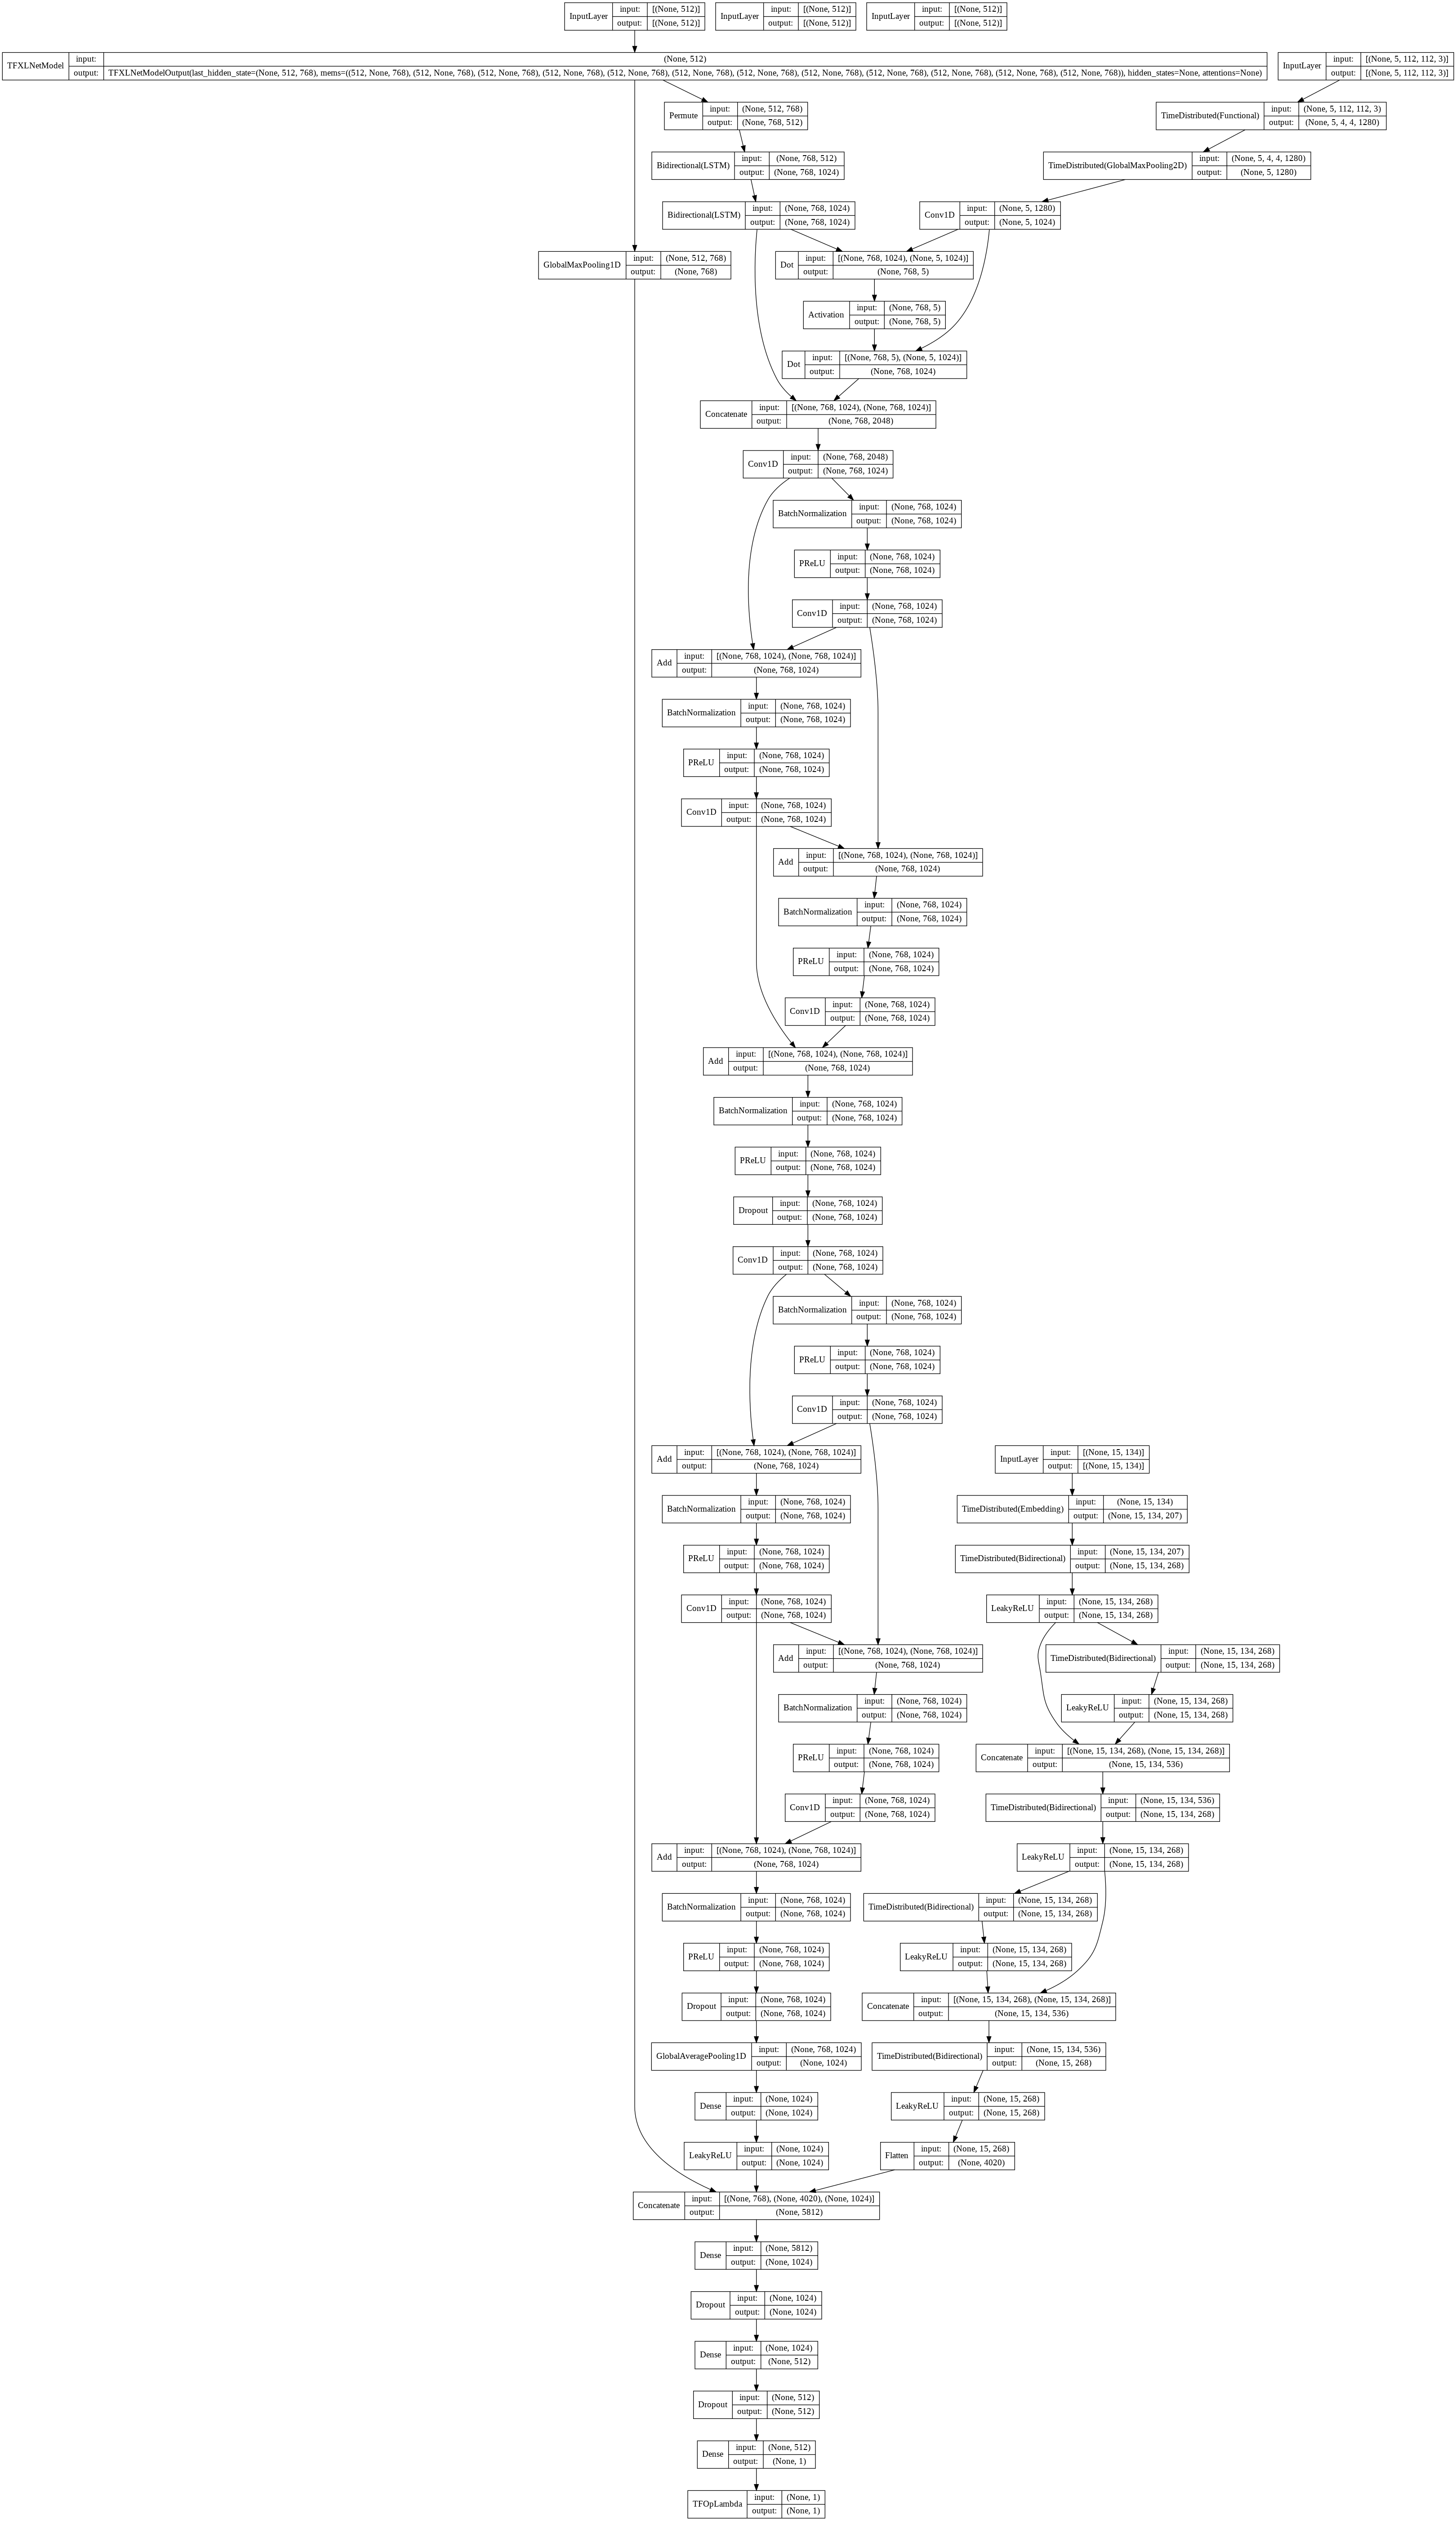

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=False, to_file="/content/multimodal_feature_attention_fusion_EffecientNet_XLNet_ResBiLSTM_character_0.png")

In [ ]:
#training for 15 comments, 6 epochs
comments_ = 15
target_shape=(112,112)
number_of_epochs = 20
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import gc
gc.collect
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
#filepath="/content/drive/MyDrive/research_/models/XLNet_Caps_SentEmbed/saved/weights0-improvement-{epoch:02d}-{val_acc:.2f}/"
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=3, verbose=1)
trainGenerator = DataGenerator(train_df, batch_size=2, num_comments=comments_, target_shape=target_shape)
validationGenerator = DataGenerator(validate_txt_df, batch_size=2, num_comments=comments_, target_shape=target_shape)
#checkpoint = ModelCheckpoint(filepath,save_weights_only=True,monitor='val_auc',mode='max',save_best_only=True)

history = model.fit(trainGenerator, epochs=number_of_epochs, validation_data = validationGenerator, callbacks = [reduce_lr], verbose=1, max_queue_size=1, workers=3)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Epoch 1/20
479/479 [==============================] - 719s 1s/step - loss: 0.9749 - acc: 0.5282 - auc: 0.5487 - precision: 0.5281 - recall: 0.5303 - true_positives: 254.0000 - true_negatives: 252.0000 - false_positives: 227.0000 - false_negatives: 225.0000 - val_loss: 0.8373 - val_acc: 0.4167 - val_auc: 0.6356 - val_precision: 0.3333 - val_recall: 0.9310 - val_true_positives: 27.0000 - val_true_negatives: 13.0000 - val_false_positives: 54.0000 - val_false_negatives: 2.0000
Epoch 2/20
479/479 [==============================] - 532s 1s/step - loss: 0.7422 - acc: 0.6023 - auc: 0.6285 - precision: 0.6017 - recall: 0.6054 - true_positives: 290.0000 - true_negatives: 287.0000 - false_positives: 192.0000 - false_negatives: 189.0000 - val_loss: 0.5770 - val_acc: 0.7083 - val_auc: 0.7247 - val_precision: 0.6250 - val_recall: 0.1667 - val_true_positives: 5.0000 - val_true_negatives: 63.0000 - val_false_positives: 3.0000 - val_false_negatives: 25.0000
Epoch 3/20
479/479 [=========================

In [ ]:
#----------------------Sampling from dataset-------------------------------------
index = train_txt_df.index.values.tolist()
#id = train_txt_img_df['tweet_id'].values.tolist()
#id = np.asarray(id)
label = train_txt_df['question2'].values.tolist()
label = np.array(label)
label = list(label)
ids = []
for i in range(0,len(index)):
  ids.append([index[i], label[i]])

!pip install imbalanced-learn
	
# check version number
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.5)
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

train_df_over, train_label_df_over = oversample.fit_resample(ids, label)
train_df_over, train_label_df_over = undersample.fit_resample(train_df_over, train_label_df_over)
print(train_df_over.shape)

print(train_df_over)
print(train_label_df_over)

from collections import Counter
print(Counter(train_label_df_over))

train_list = []
for i in range(0,len(train_df_over)):
  #'labels','input_ids','token_type_ids','attention_mask','image_dir','char_embed'
  #'question1',	'question2',	'likecount',	'comments',	'directory',	'mediacaption_t',	'comments_char'
  index = train_df_over[i][0]
  question1	= train_txt_df['question1'][index]
  question2	= train_txt_df['question2'][index]
  likecount	= train_txt_df['likecount'][index]
  comments = train_txt_df['comments'][index]
  directory	= train_txt_df['directory'][index]
  mediacaption_t = train_txt_df['mediacaption_t'][index]
  comments_char = train_txt_df['comments_char'][index]

  train_list.append([question1, question2, likecount,	comments,	directory, mediacaption_t,	comments_char])
train_df = pd.DataFrame(train_list, columns=['question1',	'question2', 'likecount',	'comments',	'directory', 'mediacaption_t', 'comments_char'])
train_df = sklearn.utils.shuffle(train_df)
print(train_df)
print(train_df['comments_char'][2].shape)

del question1, question2, likecount, comments, directory, mediacaption_t, comments_char
del train_df_over, train_label_df_over, label, index, ids
del train_txt_df, df_txt, df, data, data_1

In [ ]:
#-----------------------------------------------------proposed Model_1---------------------------------------------------------------------------------

#!pip install transformers
import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow.keras import layers 
num_comments = 15
sequence_length = 512

#-------------------------optimiser, loss and metrics-----------------------------------------------------------------------------------------
# classifier AdamW recommended for BERT/XLNet
# recommended learning rate for Adam 5e-5, 3e-5, 2e-5
learning_rate = 3e-5
number_of_epochs = 3
n_gram = 9
#batch_size=32
step = tf.Variable(0, trainable=False)
schedule = tf.optimizers.schedules.PiecewiseConstantDecay(
    [10000, 15000], [1e-0, 1e-1, 1e-2])
# lr and wd can be a function or a tensor
lr = 3e-5 * schedule(step)
wd = lambda: 1e-4 * schedule(step)

# ...
optimizer = tfa.optimizers.AdamW(learning_rate=learning_rate, weight_decay=wd, epsilon=1e-08)
#optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)

loss = tf.keras.losses.BinaryCrossentropy()#from_logits=True)
metric = ['acc',tf.keras.metrics.AUC(),
          tf.keras.metrics.Precision(),
          tf.keras.metrics.Recall(),
          tf.keras.metrics.TruePositives(),
          tf.keras.metrics.TrueNegatives(),
          tf.keras.metrics.FalsePositives(),
          tf.keras.metrics.FalseNegatives()]
#---------------------------------------------------------------------------------------------------------------------------------------------

#--------------------------------video model--------------------------------------------------------------------------------------------------
from tensorflow.keras.applications import efficientnet as efn
import tensorflow as tf
num_frame = 5
img_size = 112
channels = 3
image_augmented = tf.keras.layers.Input(shape=(img_size, img_size, channels), name='image_augmented',dtype=tf.float32)
img_model = efn.EfficientNetB0(include_top=False, input_tensor=image_augmented, weights="imagenet")
#img_model.trainable = True
#fine tuning last 10 layers of effecientnet
#for layer in img_model.layers[-10:]:
#  if not isinstance(layer, tf.keras.layers.BatchNormalization):
#    layer.trainable = True
    
video_frames = tf.keras.layers.Input(shape=(num_frame, img_size, img_size, channels), name='video_frames',dtype=tf.float32)

video_model = tf.keras.layers.TimeDistributed(img_model)(video_frames)
video_model_gpool = tf.keras.layers.TimeDistributed(tf.keras.layers.GlobalMaxPool2D())(video_model)
#video_gru = tf.keras.layers.GRU(512)(video_model_gpool)
#------------------------------------------------------------------------------------------------------------------------------------------------

#--------------------------------XLNet model-----------------------------------------------------------------------------------------------------
from transformers import TFXLNetModel
XLNet_model = TFXLNetModel.from_pretrained('xlnet-base-cased')
XLNet_model.training = True

input_ids = layers.Input(shape=(sequence_length,), name='input_ids', dtype=tf.int32)
attention_mask = layers.Input(shape=(sequence_length,), name='input_attention_mask', dtype=tf.int32)
token_type_ids = layers.Input(shape=(sequence_length,), name='input_token_type_id', dtype=tf.int32)


#encoder_inputs = dict(
#    input_word_ids=input_ids,
#    input_mask=attention_mask,
#    input_type_ids=token_type_ids)
 
XLNet_output = XLNet_model(input_ids,token_type_ids=token_type_ids,attention_mask=attention_mask)
sequence_output = XLNet_output.last_hidden_state
pooled_output = layers.GlobalMaxPool1D()(sequence_output)


#embedding_BERT = transformer_Bert.bert([input_ids,attention_mask,token_type_ids])
#embedding_BERT = transformer_Bert(input_ids,token_type_ids=token_type_ids,attention_mask=attention_mask)[0]
#pooled_output = layers.GlobalMaxPool1D()(embedding_BERT)

#####
sequence_output = tf.keras.layers.Permute((2,1), name='transpose')(sequence_output)
#-------------------------------------------------------------------------------------------------------------------------------------------------

#max_len_cap = 140
#caption = tf.keras.layers.Input(shape=(max_len_cap,), name= 'caption', dtype=tf.int32)
#likes = tf.keras.layers.Input(shape=(1,), name='likes', dtype=tf.float32)

#embedding_dim = 100
#max_words = 50402  # We will only consider the top  words in the dataset
#embedding_caption = tf.keras.layers.Embedding(max_words, embedding_dim)(caption)
#-------------------------------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------ResBiLSTM with character embeddings--------------------------------------------------------------
num_comments = 15
seq_length = max_len_c
ResBiLSTM_input = Input(shape=(num_comments,seq_length,), name = 'ResBiLSTM_input', dtype=tf.int32)

#########character embedding layer
# Embedding layer Initialization
input_size = max_len_c
embedding_size = char_vocab_size
#char_embedding_layer = tf.keras.layers.Embedding(vocab_size + 1,embedding_size,input_length=input_size,weights=[char_embedding_weights])

embedding_comment = TimeDistributed(Embedding(char_vocab_size + 1,
                            embedding_size,
                            input_length=input_size,
                            weights=[char_embedding_weights]))(ResBiLSTM_input)

x = TimeDistributed(Bidirectional(LSTM(seq_length, return_sequences=True, kernel_initializer='glorot_uniform')))(embedding_comment)
x1 = LeakyReLU(0.2)(x)

x = TimeDistributed(Bidirectional(LSTM(seq_length, return_sequences=True, kernel_initializer='glorot_uniform')))(x1)
x = LeakyReLU(0.2)(x)

x = concatenate([x1, x])

x = TimeDistributed(Bidirectional(LSTM(seq_length, return_sequences=True, kernel_initializer='glorot_uniform')))(x)
x1 = LeakyReLU(0.2)(x)

x = TimeDistributed(Bidirectional(LSTM(seq_length, return_sequences=True, kernel_initializer='glorot_uniform')))(x1)
x = LeakyReLU(0.2)(x)

x = concatenate([x1, x])


x = TimeDistributed(Bidirectional(LSTM(seq_length, return_sequences=False, kernel_initializer='glorot_uniform')))(x)
ResBiLSTM = LeakyReLU(0.2)(x)

flattened_ResBiLSTM = layers.Flatten()(ResBiLSTM)
#-------------------------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------------------------
hidden_size = 512
BiLSTM_sequence_output = Bidirectional(LSTM(hidden_size, return_sequences=True, kernel_initializer='glorot_uniform'), name='text_bilstm-1')(sequence_output)
text = Bidirectional(LSTM(hidden_size, return_sequences=True, kernel_initializer='glorot_uniform'), name='text_bilstm-2')(BiLSTM_sequence_output)

video = Conv1D(filters=hidden_size*2, kernel_size=3, padding='same', activation='relu')(video_model_gpool)

#video = recurrent_block(video)
#video = recurrent_block(video)

attention = Dot(axes=(2, 2))([text, video])
attention = Activation('softmax', name='softmax')(attention)

context = Dot(axes=(2, 1), name='video_context')([attention, video])
text_combined_context = concatenate([context, text])

#rcnn_0 = recurrentCNN_block(text_combined_context)
#rcnn_1 = recurrentCNN_block(rcnn_0)
#x = Bidirectional(LSTM(self.hidden_size, return_sequences=True, kernel_initializer='glorot_uniform'))(text_combined_context)

ga_rcnn_1 = GlobalAveragePooling1D()(text_combined_context)
#x2 = GlobalMaxPooling1D()(x)

#x = concatenate([x1, x2])
dense_rcnn_attention_fusion = Dense(hidden_size*2, kernel_initializer='glorot_uniform')(ga_rcnn_1)
RCNN_attention_fusion = LeakyReLU(0.2)(dense_rcnn_attention_fusion)

#-------------------------------------------------------------------------------------------------------------------------------------------------

#BiLstm = layers.Bidirectional(layers.LSTM(256, return_sequences=False))(sequence_output)

#BiLstm_caption = layers.Bidirectional(layers.LSTM(100, return_sequences=False))(embedding_caption)
concat_simple = layers.concatenate([pooled_output,flattened_ResBiLSTM,RCNN_attention_fusion], axis = 1) #BiLstm_caption,likes,BiLstm,video_gru,

dense_3 = layers.Dense(1024, activation = 'selu')(concat_simple)
#batch_norm_1 = tf.keras.layers.BatchNormalization()(dense_3)
dense_3 = Dropout(0.1)(dense_3)

dense_2 = layers.Dense(512, activation = 'selu')(dense_3)
#batch_norm_2 = tf.keras.layers.BatchNormalization()(dense_2)
dense_2 = Dropout(0.1)(dense_2)

outputs = layers.Dense(1)(dense_2)
outputs = tf.keras.activations.sigmoid(outputs)

model = tf.keras.Model(inputs=[video_frames,input_ids,token_type_ids,attention_mask,ResBiLSTM_input],outputs=outputs, name = 'XLNet_BiLSTM_SentEmbed_0') #,caption,likes
model.compile(optimizer=optimizer, loss=tf.keras.losses.BinaryCrossentropy(), metrics=metric)
model.summary()

16711680/16705208 [==============================] - 0s 0us/step


Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetModel: ['lm_loss']
- This IS expected if you are initializing TFXLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLNetModel were initialized from the model checkpoint at xlnet-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLNetModel for predictions without further training.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experi

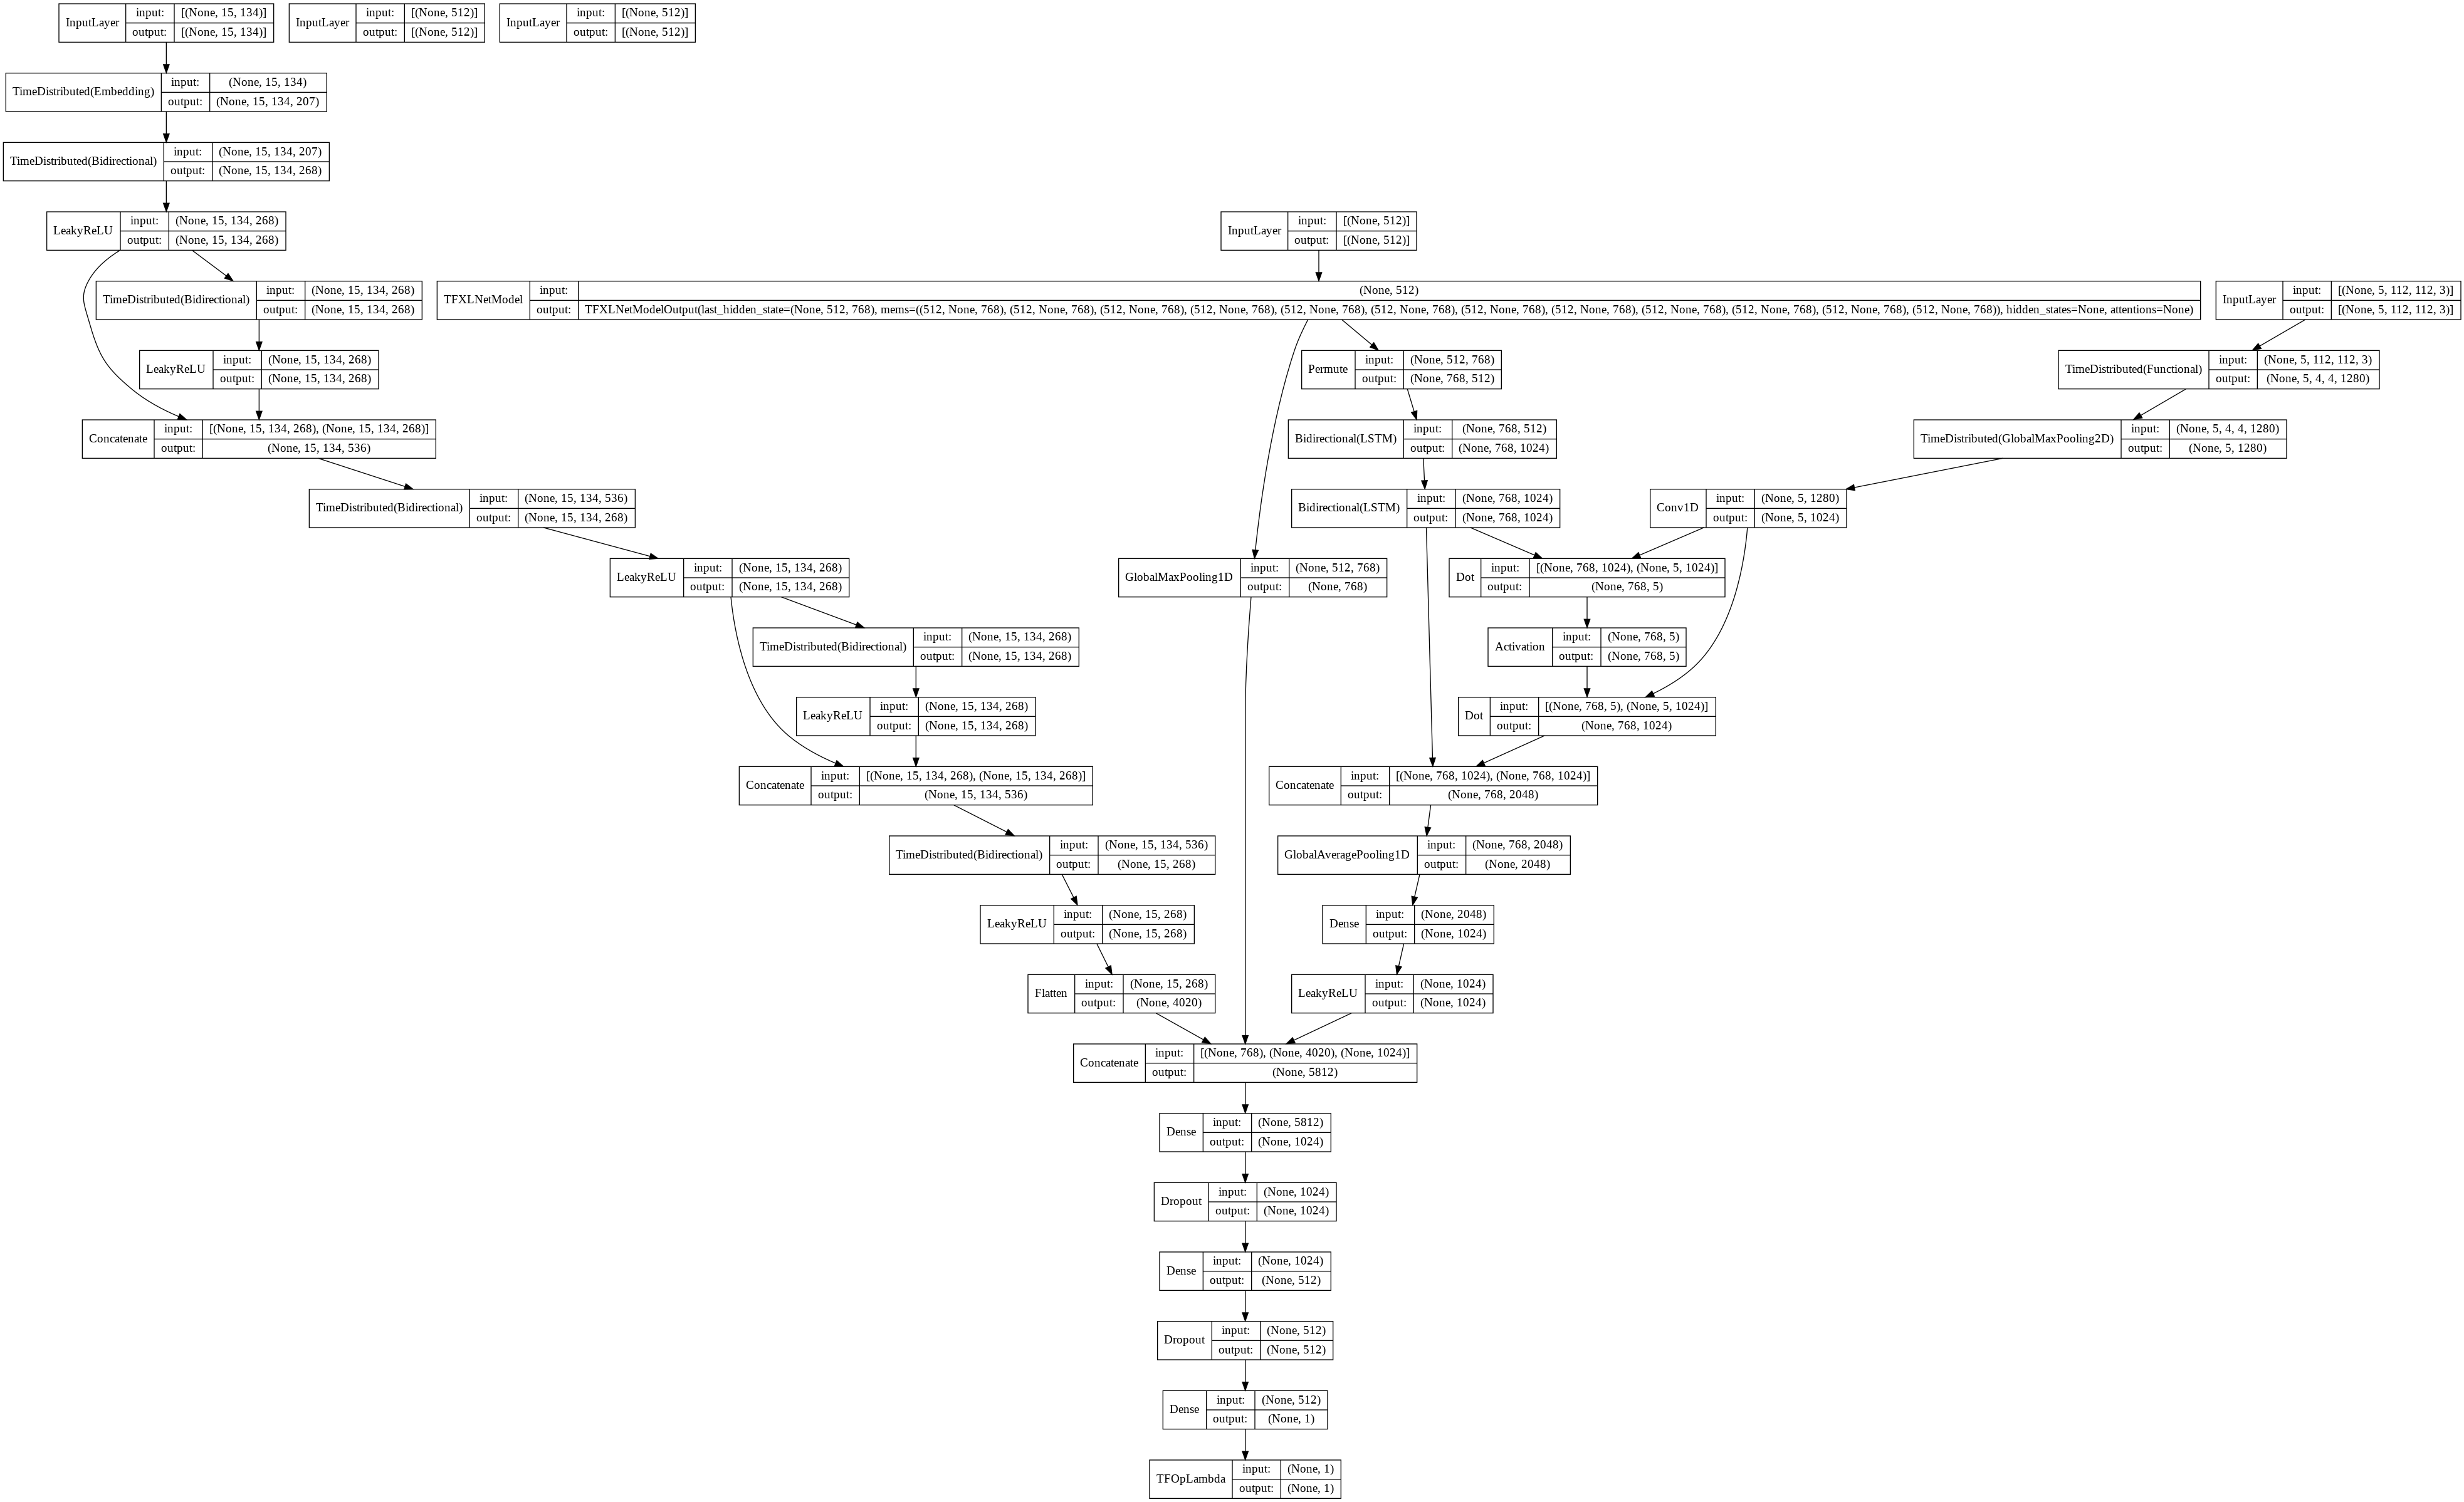

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=False, to_file="/content/TVC.png")

In [ ]:
#training for 15 comments, 6 epochs
comments_ = 15
target_shape=(112,112)
number_of_epochs = 20
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import gc
gc.collect
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
#filepath="/content/drive/MyDrive/research_/models/XLNet_Caps_SentEmbed/saved/weights0-improvement-{epoch:02d}-{val_acc:.2f}/"
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=3, verbose=1)
trainGenerator = DataGenerator(train_df, batch_size=2, num_comments=comments_, target_shape=target_shape)
validationGenerator = DataGenerator(validate_txt_df, batch_size=2, num_comments=comments_, target_shape=target_shape)
#checkpoint = ModelCheckpoint(filepath,save_weights_only=True,monitor='val_auc',mode='max',save_best_only=True)

history = model.fit(trainGenerator, epochs=number_of_epochs, validation_data = validationGenerator, callbacks = [reduce_lr], verbose=1, max_queue_size=1, workers=3)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Epoch 1/20
299/299 [==============================] - 872s 3s/step - loss: 1.0443 - acc: 0.5953 - auc: 0.6299 - precision: 0.5966 - recall: 0.5886 - true_positives: 176.0000 - true_negatives: 180.0000 - false_positives: 119.0000 - false_negatives: 123.0000 - val_loss: 1.3653 - val_acc: 0.4062 - val_auc: 0.7946 - val_precision: 0.3372 - val_recall: 1.0000 - val_true_positives: 29.0000 - val_true_negatives: 10.0000 - val_false_positives: 57.0000 - val_false_negatives: 0.0000e+00
Epoch 2/20
299/299 [==============================] - 756s 3s/step - loss: 0.7140 - acc: 0.6522 - auc: 0.7271 - precision: 0.6512 - recall: 0.6555 - true_positives: 196.0000 - true_negatives: 194.0000 - false_positives: 105.0000 - false_negatives: 103.0000 - val_loss: 0.5399 - val_acc: 0.7396 - val_auc: 0.8172 - val_precision: 0.5581 - val_recall: 0.8000 - val_true_positives: 24.0000 - val_true_negatives: 47.0000 - val_false_positives: 19.0000 - val_false_negatives: 6.0000
Epoch 3/20
299/299 [====================